### 4주차 미션 소개 - 새로운 데이터셋에 분류 모델 적용하기
* 다음의 과정을 활용하여 새로운 데이터셋에 분류 모델을 적용해 주세요.
* 분류 모델은 다음의 사이트에서 Classification 으로 된 문제를 찾아서 진행하되 데이터셋이 너무 크면 학습에 시간이 오래 걸리니 500MB 내외의 데이터셋을 활용하는 것을 추천합니다. 또, 기존에 다른 사람들이 공유한 노트북을 참고하여 나만의 모델의 만들어 보는데 도움을 받아보세요.
*[https://www.kaggle.com/competitions](https://www.kaggle.com/competitions)
* [https://dacon.io/competitions](https://dacon.io/competitions)

* 주제: 은행 고객 이탈 예측
* About Dataset: [Bank Churn Dataset | Kaggle](https://www.kaggle.com/datasets/rangalamahesh/bank-churn)
> This dataset is for ABC Multistate bank with following columns:
> * 컬럼정보: customer_id, credit_score, country, gender, age, tenure,balance, products_number, credit_card, active_member, estimated_salary, churn



### 나름전설이다코치_03팀 미션 수행 프로세스

1. 분석 대상 데이터셋 선정
> a. 원활한 학습 등을 위해 데이터 용량 500MB 이내
2. 검증 데이터셋 설정
> a. 사이킷런의 train_test_split() 메서드 사용, train 8 : test 2 로 나누기
> b. random_state = 42로 하여 각자 수행하더라도 데이터셋이 서로 다르지 않도록
3. 데이터 탐색
> a. 데이터에 대한 이해를 돕기 위함으로 최종 분류 모형 적용을 위한 필수 과정은 아닙니다.
> b. 시각화 등을 통해 한눈에 데이터 구조를 파악할 수 있도록 노력
4. 데이터 전처리 및 변수 선택
> a. 모형에 투입하기 위한 변수 생성
> b. 상관관계 분석 등을 통해 모형 학습을 저해시킬 수 있는 변수 제거 등 변수 선택
5. 알고리즘 선정
> a. 다양한 분류 알고리즘(Randomforest, GBM, Logistic Regression 등) 후보 중 일부 선정
6. 모형 학습 및 검증, 개선
> a. 분류 모형 학습 후 Accuracy와 F1-Score 두 가지 measure로 정확도 측정
> b. 각 알고리즘 별 하이퍼파라미터 튜닝(Grid search, Random search 등)하여 성능 개선
> c. 여러 개의 데이터셋과 알고리즘을 학습, 정확도 측정 후 비교를 통해 최종 모형 선정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 미션 1) 데이터 로드와 피처엔지니어링
* 데이터셋을 탐색하여 기본적인 통계, 분포, 결측치 등을 확인합니다.
* 필요에 따라 결측치 처리, 이상치 제거, 데이터 형식 변환 등의 전처리 작업을 수행합니다.
* 피처 엔지니어링을 통해 데이터의 특성에 맞게 피처를 선택, 생성, 변환합니다.
* 예를 들어, 범주형 데이터의 경우 One-hot encoding을 적용할 수 있습니다.

## (1) 데이터 로드 및 탐색

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/부스트코스2024/data/train.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
df.groupby('CustomerId').size().value_counts()

1     9301
2     2945
3     1373
4      929
5      702
      ... 
78       1
67       1
85       1
73       1
99       1
Length: 88, dtype: int64

In [ ]:
df.groupby('CustomerId').size()[df.groupby('CustomerId').size() > 5]

CustomerId
15565796     8
15565806     6
15565878    12
15565996     6
15566030     6
            ..
15815530     6
15815534     6
15815626     6
15815645    13
15815690    12
Length: 7971, dtype: int64

In [ ]:
df[df['CustomerId'] == 15565878]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7380,7380,15565878,Bates,631,Spain,Male,47.0,6,0.00,1,0.0,1.0,197963.46,1
37134,37134,15565878,Black,631,France,Male,30.0,1,0.00,2,1.0,1.0,197963.46,0
44162,44162,15565878,Bates,488,France,Male,41.0,5,0.00,1,1.0,1.0,197963.46,0
48496,48496,15565878,Ukaegbunam,707,Spain,Female,45.0,2,0.00,2,1.0,0.0,101039.53,0
69206,69206,15565878,Bates,631,France,Female,29.0,3,0.00,2,1.0,1.0,197963.46,0
87458,87458,15565878,Bates,631,Spain,Male,32.0,3,0.00,2,1.0,0.0,197963.46,0
90827,90827,15565878,Dyer,695,Spain,Male,31.0,4,97554.03,1,1.0,1.0,182612.71,0
102880,102880,15565878,Bates,631,France,Male,29.0,5,0.00,2,1.0,1.0,197963.46,0
115618,115618,15565878,Bates,631,Spain,Male,29.0,3,0.00,1,1.0,1.0,197963.46,0
132348,132348,15565878,Bateson,683,Spain,Male,29.0,3,0.00,1,1.0,1.0,197963.46,0


In [ ]:
df.groupby('Geography', dropna = False).size()

Geography
France     94215
Germany    34606
Spain      36213
dtype: int64

In [ ]:
df.groupby('Gender', dropna = False).size()

Gender
Female    71884
Male      93150
dtype: int64

## (2) 변수별 타겟(Exited) 비중 탐색 - 시각화

In [ ]:
df.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

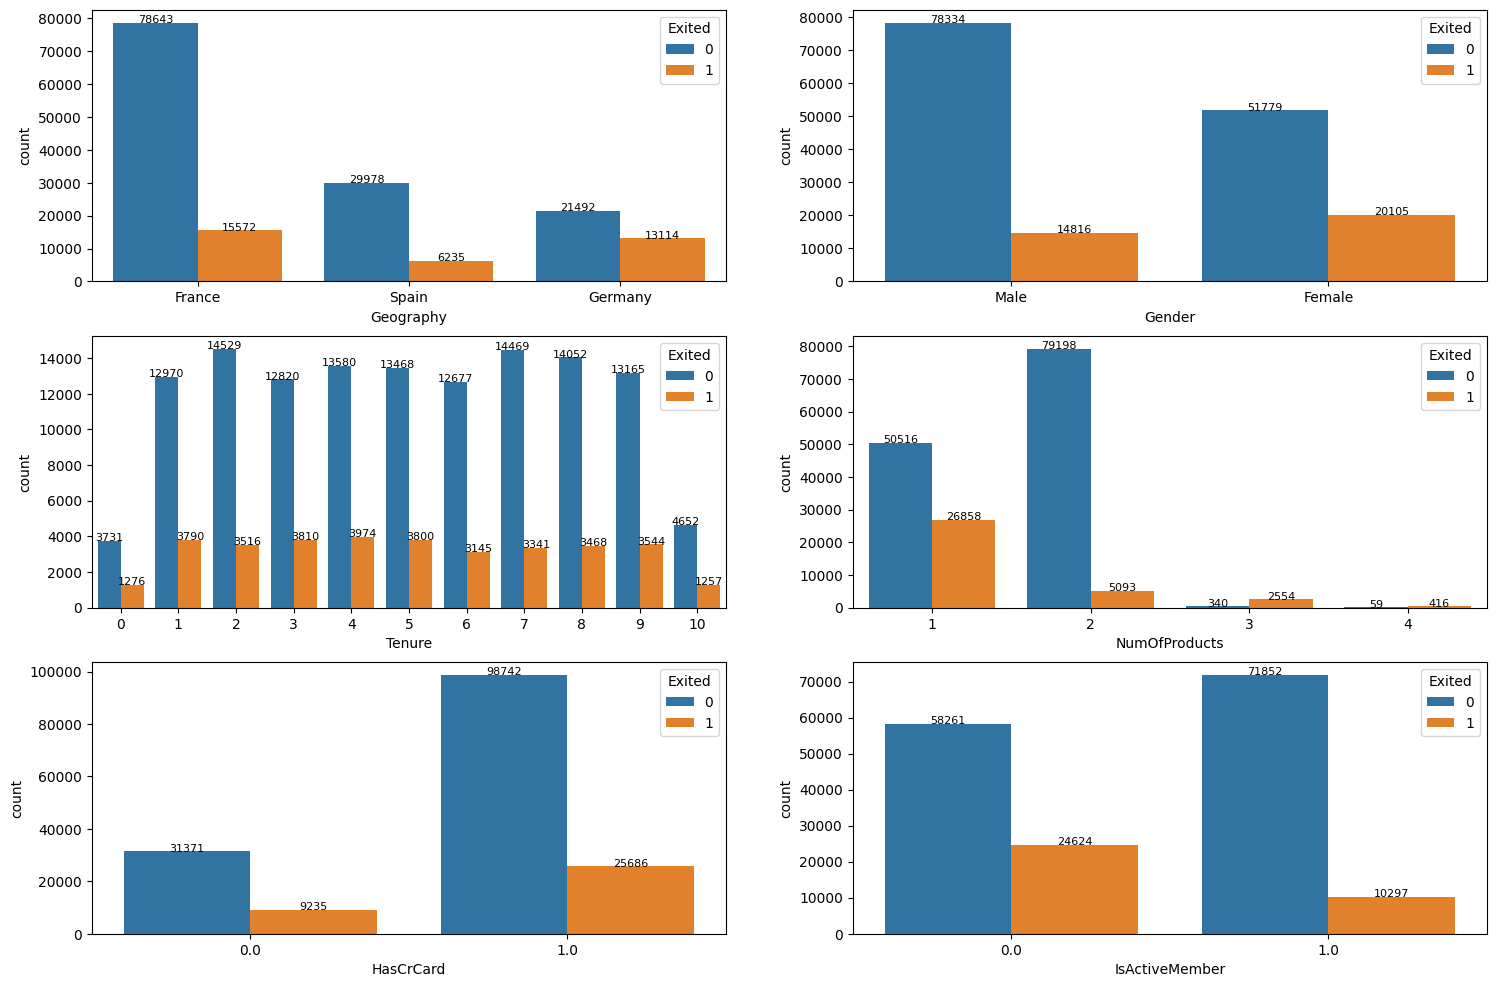

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

list_cate_col = df.nunique()[df.nunique() < 20].index.tolist()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
axes = axes.flatten()
for ax, col in zip(axes,list_cate_col[:-1]):
    sns.countplot(data = df, x = col, hue = 'Exited', ax = ax)

    # xticks 값이 길고 공백(space)로 분리된 경우, 공백을 들여쓰기(line indentation)으로 변경하여 글자 식별이 잘 되도록 설정
    # if col == 'PaymentMethod':
    #     list_col_vals = [v.replace(' ', '\n') for v in df[col].value_counts(dropna = False).index]
    #     plt.xticks(ticks = range(len(list_col_vals)), labels = list_col_vals, fontsize = 9)

    # 막대마다 빈도(count) 값 표시 - 표시 위치: 가로 기준 막대 중앙 & 세로 기준 막대 위
    for p in ax.patches:
        if p.get_width() != 0:  # witdh 가 0 인 값이 존재, 해당 조건이 없을 시 x축에 '0'이 표시됨.
            ax.text(x = p.get_x() + (p.get_width() / 2),  # 가로 위치
                    y = p.get_y() + p.get_height(),  # 세로 위치
                    s = f"{int(p.get_height())}",  # 값 표시방법
                    ha = 'center', # 좌우정렬 중간으로
                    fontsize = 8)

In [ ]:
def range_bin(x, divisor, floor=True, digit=0):
    if x != x: # Check if x is NaN (without using math or numpy)
        result = None

    else:
        bin_min = (-(-x//divisor) - 1) * divisor
        bin_max = -(-x//divisor) * divisor

        if floor:
            bin_min = int(bin_min//1)
            bin_max = int(bin_max//1)
            result = str(bin_min).rjust(digit, '0') + '\n~'+ str(bin_max).rjust(digit, '0')

    return result

print(range_bin(935.7, 100, digit = 4))

0900
~1000


### (2.1) Binning variable - CreditScore

<Axes: ylabel='Churn_rate_tot'>

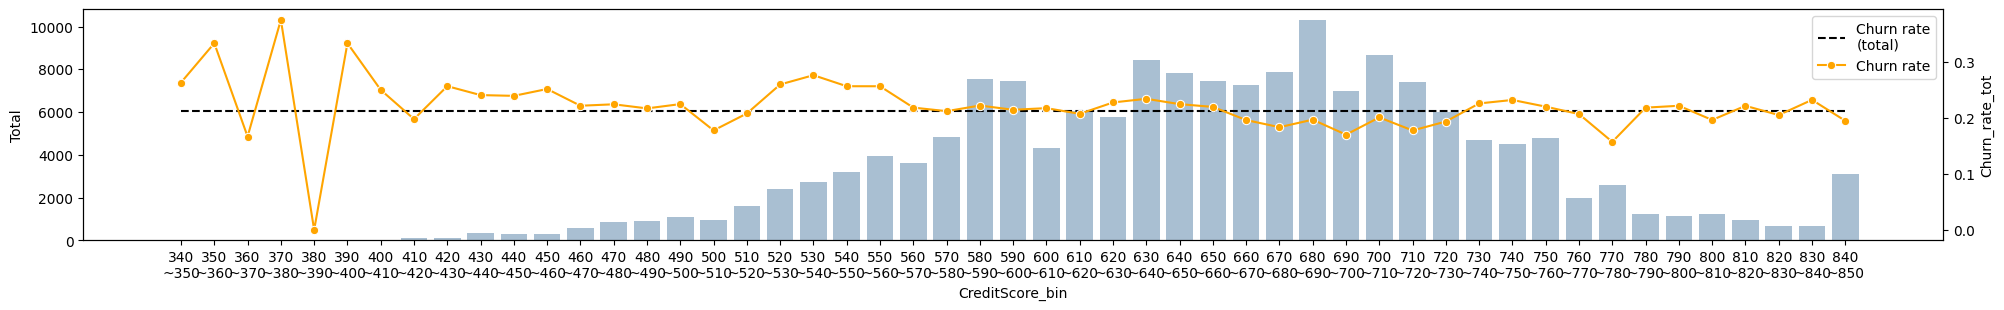

In [ ]:
df_t = df.copy()

df_t['CreditScore_bin'] = df['CreditScore'].apply(lambda x: range_bin(x, divisor = 10, digit = 3))

df_t_grp_cnt = df_t.groupby(['Exited','CreditScore_bin'], dropna = False, as_index = False).agg(count = ('Exited','size'))
# df_t_grp_cnt['group_count'] = df_t_grp_cnt.groupby('Exited')['count'].transform('sum')
# df_t_grp_cnt['Churn_rate'] = df_t_grp_cnt['count'] / df_t_grp_cnt['group_count']

df_confusion_table = df_t_grp_cnt.pivot_table(index = 'CreditScore_bin', columns = 'Exited', values = 'count',
                                              aggfunc = 'sum', margins = True, margins_name='Total').fillna(0).astype(int)
df_confusion_table['Churn_rate'] = df_confusion_table[1] / df_confusion_table['Total']
df_confusion_table['Churn_rate_tot'] = df_confusion_table.loc['Total','Churn_rate']

ax1 = sns.set_style(style = None, rc = None)

fig, ax1 = plt.subplots(figsize = (24,3))

sns.barplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1], x = 'CreditScore_bin', y = 'Total',
            color = 'steelblue', alpha = 0.5, ax = ax1)
ax2 = ax1.twinx()

sns.lineplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1]['Churn_rate_tot'],
             color = 'black', sort = False, ax = ax2, label = 'Churn rate\n(total)', linestyle = '--')
sns.lineplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1]['Churn_rate'],
             color = 'orange', marker='o', sort = False, ax = ax2, label = 'Churn rate')

<Axes: ylabel='Churn_rate_tot'>

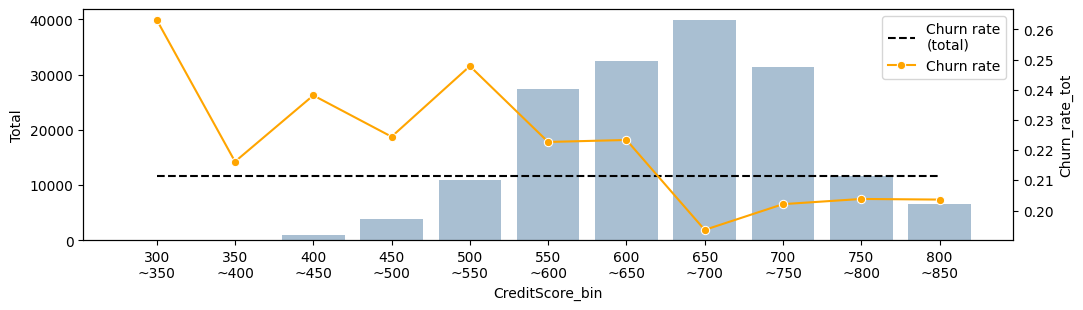

In [ ]:
df_t = df.copy()

df_t['CreditScore_bin'] = df['CreditScore'].apply(lambda x: range_bin(x, divisor = 50, digit = 3))

df_t_grp_cnt = df_t.groupby(['Exited','CreditScore_bin'], dropna = False, as_index = False).agg(count = ('Exited','size'))
# df_t_grp_cnt['group_count'] = df_t_grp_cnt.groupby('Exited')['count'].transform('sum')
# df_t_grp_cnt['Churn_rate'] = df_t_grp_cnt['count'] / df_t_grp_cnt['group_count']

df_confusion_table = df_t_grp_cnt.pivot_table(index = 'CreditScore_bin', columns = 'Exited', values = 'count',
                                              aggfunc = 'sum', margins = True, margins_name='Total').fillna(0).astype(int)
df_confusion_table['Churn_rate'] = df_confusion_table[1] / df_confusion_table['Total']
df_confusion_table['Churn_rate_tot'] = df_confusion_table.loc['Total','Churn_rate']

ax1 = sns.set_style(style = None, rc = None)

fig, ax1 = plt.subplots(figsize = (12,3))

sns.barplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1], x = 'CreditScore_bin', y = 'Total',
            color = 'steelblue', alpha = 0.5, ax = ax1)
ax2 = ax1.twinx()

sns.lineplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1]['Churn_rate_tot'],
             color = 'black', sort = False, ax = ax2, label = 'Churn rate\n(total)', linestyle = '--')
sns.lineplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1]['Churn_rate'],
             color = 'orange', marker='o', sort = False, ax = ax2, label = 'Churn rate')

### (2.2) Binning variable - Balance

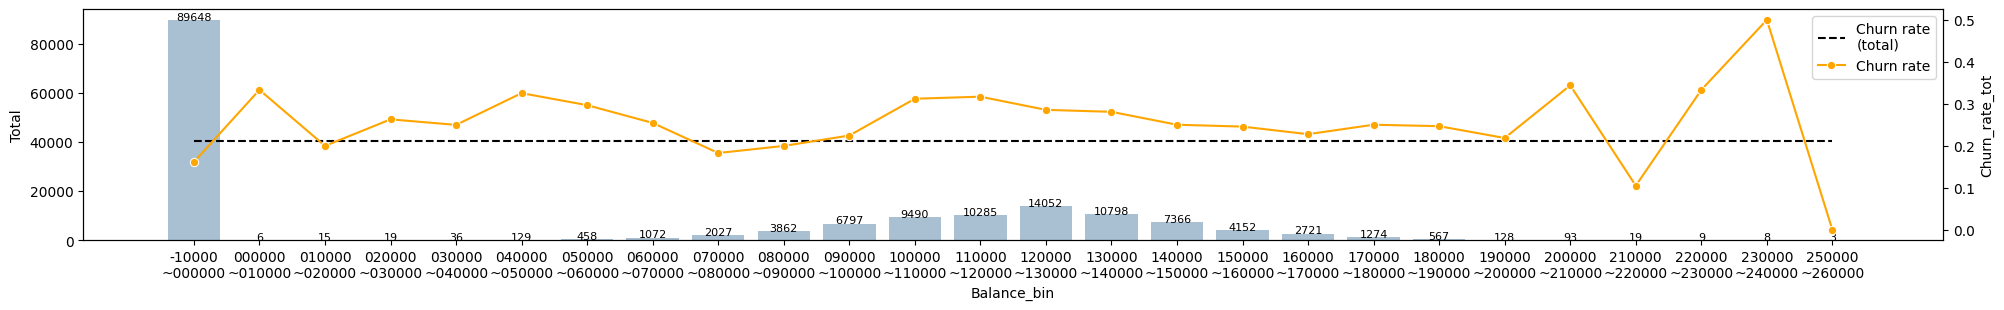

In [ ]:
df_t = df.copy()

df_t['Balance_bin'] = df['Balance'].apply(lambda x: range_bin(x, divisor = 10000, digit = 6))

df_t_grp_cnt = df_t.groupby(['Exited','Balance_bin'], dropna = False, as_index = False).agg(count = ('Exited','size'))
# df_t_grp_cnt['group_count'] = df_t_grp_cnt.groupby('Exited')['count'].transform('sum')
# df_t_grp_cnt['Churn_rate'] = df_t_grp_cnt['count'] / df_t_grp_cnt['group_count']

df_confusion_table = df_t_grp_cnt.pivot_table(index = 'Balance_bin', columns = 'Exited', values = 'count',
                                              aggfunc = 'sum', margins = True, margins_name='Total').fillna(0).astype(int)
df_confusion_table['Churn_rate'] = df_confusion_table[1] / df_confusion_table['Total']
df_confusion_table['Churn_rate_tot'] = df_confusion_table.loc['Total','Churn_rate']

ax1 = sns.set_style(style = None, rc = None)

fig, ax1 = plt.subplots(figsize = (24,3))

sns.barplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1], x = 'Balance_bin', y = 'Total',
            color = 'steelblue', alpha = 0.5, ax = ax1)
ax2 = ax1.twinx()

sns.lineplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1]['Churn_rate_tot'],
             color = 'black', sort = False, ax = ax2, label = 'Churn rate\n(total)', linestyle = '--')
sns.lineplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1]['Churn_rate'],
             color = 'orange', marker='o', sort = False, ax = ax2, label = 'Churn rate')

# 막대마다 빈도(count) 값 표시 - 표시 위치: 가로 기준 막대 중앙 & 세로 기준 막대 위
for p in ax1.patches:
    if p.get_width() != 0:  # witdh 가 0 인 값이 존재, 해당 조건이 없을 시 x축에 '0'이 표시됨.
        ax1.text(x = p.get_x() + (p.get_width() / 2),  # 가로 위치
                y = p.get_y() + p.get_height(),  # 세로 위치
                s = f"{int(p.get_height())}",  # 값 표시방법
                ha = 'center', # 좌우정렬 중간으로
                fontsize = 8)

### (2.3) Binning variable - EstimatedSalary

<Axes: ylabel='Churn_rate_tot'>

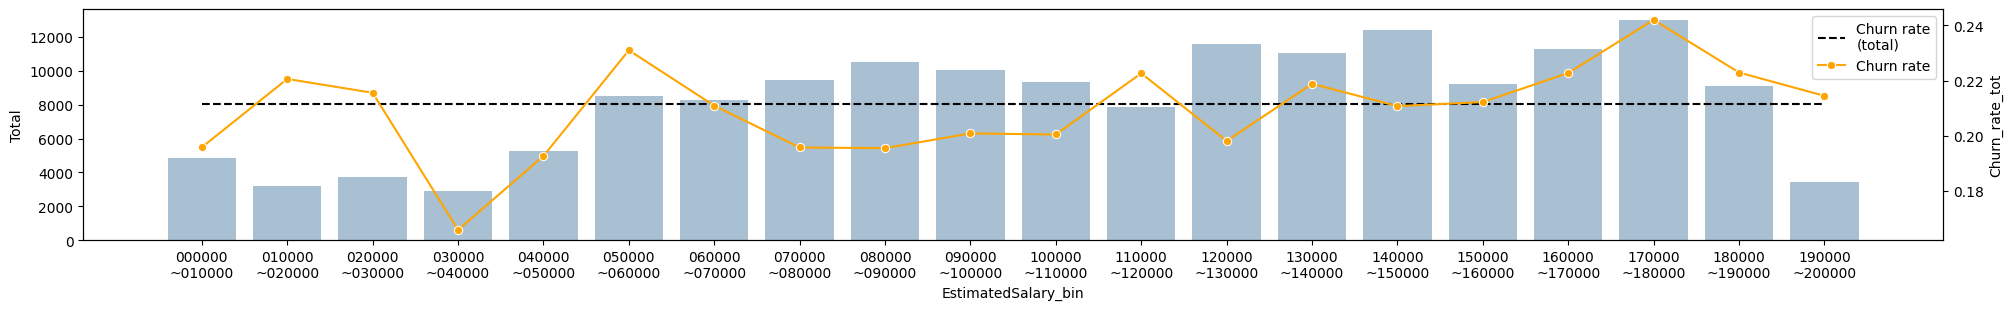

In [ ]:
df_t = df.copy()

df_t['EstimatedSalary_bin'] = df['EstimatedSalary'].apply(lambda x: range_bin(x, divisor = 10000, digit = 6))

df_t_grp_cnt = df_t.groupby(['Exited','EstimatedSalary_bin'], dropna = False, as_index = False).agg(count = ('Exited','size'))
# df_t_grp_cnt['group_count'] = df_t_grp_cnt.groupby('Exited')['count'].transform('sum')
# df_t_grp_cnt['Churn_rate'] = df_t_grp_cnt['count'] / df_t_grp_cnt['group_count']

df_confusion_table = df_t_grp_cnt.pivot_table(index = 'EstimatedSalary_bin', columns = 'Exited', values = 'count',
                                              aggfunc = 'sum', margins = True, margins_name='Total').fillna(0).astype(int)
df_confusion_table['Churn_rate'] = df_confusion_table[1] / df_confusion_table['Total']
df_confusion_table['Churn_rate_tot'] = df_confusion_table.loc['Total','Churn_rate']

ax1 = sns.set_style(style = None, rc = None)

fig, ax1 = plt.subplots(figsize = (24,3))

sns.barplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1], x = 'EstimatedSalary_bin', y = 'Total',
            color = 'steelblue', alpha = 0.5, ax = ax1)
ax2 = ax1.twinx()

sns.lineplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1]['Churn_rate_tot'],
             color = 'black', sort = False, ax = ax2, label = 'Churn rate\n(total)', linestyle = '--')
sns.lineplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1]['Churn_rate'],
             color = 'orange', marker='o', sort = False, ax = ax2, label = 'Churn rate')

### (2.4) Binning variable - age

<Axes: ylabel='Churn_rate_tot'>

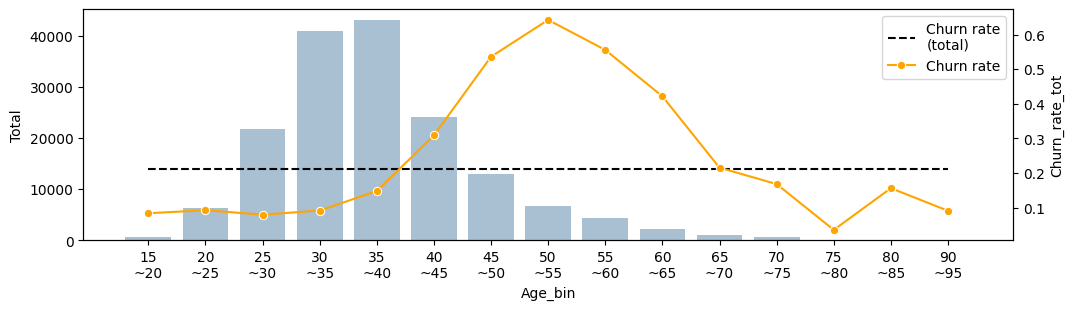

In [ ]:
df_t = df.copy()

df_t['Age_bin'] = df['Age'].apply(lambda x: range_bin(x, divisor = 5, digit = 2))

df_t_grp_cnt = df_t.groupby(['Exited','Age_bin'], dropna = False, as_index = False).agg(count = ('Exited','size'))
# df_t_grp_cnt['group_count'] = df_t_grp_cnt.groupby('Exited')['count'].transform('sum')
# df_t_grp_cnt['Churn_rate'] = df_t_grp_cnt['count'] / df_t_grp_cnt['group_count']

df_confusion_table = df_t_grp_cnt.pivot_table(index = 'Age_bin', columns = 'Exited', values = 'count',
                                              aggfunc = 'sum', margins = True, margins_name='Total').fillna(0).astype(int)
df_confusion_table['Churn_rate'] = df_confusion_table[1] / df_confusion_table['Total']
df_confusion_table['Churn_rate_tot'] = df_confusion_table.loc['Total','Churn_rate']

ax1 = sns.set_style(style = None, rc = None)

fig, ax1 = plt.subplots(figsize = (12,3))

sns.barplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1], x = 'Age_bin', y = 'Total',
            color = 'steelblue', alpha = 0.5, ax = ax1)
ax2 = ax1.twinx()

sns.lineplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1]['Churn_rate_tot'],
             color = 'black', sort = False, ax = ax2, label = 'Churn rate\n(total)', linestyle = '--')
sns.lineplot(data = df_confusion_table.reset_index()[:len(df_confusion_table)-1]['Churn_rate'],
             color = 'orange', marker='o', sort = False, ax = ax2, label = 'Churn rate')

## (3) 모형 학습을 위한 최종 데이터셋 설정
- 값의 variation이 20 미만이었던 변수는 범주화(필요한 경우) 후 투입
    - Geography
    - Gender
    - Tenure
    - NumOfProducts
    - HasCrCard
    - IsActiveMember
- 수치형 변수 중 binning에 의한 구간별 churn rate 변동이 확연히 드러나는 경우를 binning 후 투입
    - Age
    - EstimatedSalary
    - Balance
- 그외 그대로 투입
    - CreditScore
    - Surname

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
def bin_Age(x):
    if x <= 40:
        result = '015~040'
    elif x <= 65:
        result = '040~065'
    elif x > 65:
        result = '065~'
    else:
        'should check the value'

    return result

def bin_EstimatedSalary(x):
    if x <= 10000:
        result = '000000~010000'
    elif x <= 30000:
        result = '010000~030000'
    elif x <= 50000:
        result = '030000~050000'
    elif x <= 70000:
        result = '050000~070000'
    elif x <= 110000:
        result = '070000~110000'
    elif x > 110000:
        result = '110000~'
    else:
        'should check the value'

    return result

def bin_Balance(x):
    if x == 0:
        result = '000000'
    elif x <= 70000:
        result = '000000~070000'
    elif x <= 100000:
        result = '070000~100000'
    elif x > 100000:
        result = '100000~'
    else:
        'should check the value'

    return result

In [ ]:
df_pp = df[['Exited','CreditScore','Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']].copy()
df_pp['Age_bin'] = df['Age'].apply(lambda x: bin_Age(x))
df_pp['EstimatedSalary_bin'] = df['EstimatedSalary'].apply(lambda x: bin_EstimatedSalary(x))
df_pp['Balance_bin'] = df['Balance'].apply(lambda x: bin_Balance(x))
df_pp.head()

,Exited,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Age_bin,EstimatedSalary_bin,Balance_bin
0,0,668,France,Male,3,2,1.0,0.0,015~040,110000~,000000
1,0,627,France,Male,1,2,1.0,1.0,015~040,030000~050000,000000
2,0,678,France,Male,10,2,1.0,0.0,015~040,110000~,000000
3,0,581,France,Male,2,1,1.0,1.0,015~040,070000~110000,100000~
4,0,716,Spain,Male,5,2,1.0,1.0,015~040,010000~030000,000000


In [ ]:
df_pp.dtypes

Exited                   int64
CreditScore              int64
Geography               object
Gender                  object
Tenure                   int64
NumOfProducts            int64
HasCrCard              float64
IsActiveMember         float64
Age_bin                 object
EstimatedSalary_bin     object
Balance_bin             object
dtype: object

In [ ]:
df_pp.dtypes[df_pp.dtypes == 'object'].index

Index(['Geography', 'Gender', 'Age_bin', 'EstimatedSalary_bin', 'Balance_bin'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in df_pp.dtypes[df_pp.dtypes == 'object'].index:
    LE = LabelEncoder()
    LE.fit(df_pp[col])
    df_pp[col] = LE.transform(df_pp[col])
df_pp

,Exited,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Age_bin,EstimatedSalary_bin,Balance_bin
0,0,668,0,1,3,2,1.0,0.0,0,5,0
1,0,627,0,1,1,2,1.0,1.0,0,2,0
2,0,678,0,1,10,2,1.0,0.0,0,5,0
3,0,581,0,1,2,1,1.0,1.0,0,4,3
4,0,716,2,1,5,2,1.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,0,667,2,0,2,1,1.0,1.0,0,5,0
165030,0,792,0,1,3,1,0.0,0.0,0,5,0
165031,0,565,0,1,5,1,1.0,1.0,0,5,0
165032,0,554,2,0,7,1,0.0,1.0,0,4,3


# 미션 2) 모델 선택
* 분류 문제에 적합한 머신러닝 알고리즘을 선택합니다.
* 예를 들어, 로지스틱 회귀, 결정 트리, 랜덤 포레스트, 서포트 벡터 머신(SVM), 그라디언트 부스팅 등이 있습니다.
* 베이스라인 모델 생성하여 성능의 기준점을 설정합니다.

# 미션 3) 모델 훈련

* 데이터셋을 훈련 세트와 테스트 세트로 분할합니다.
* 일반적으로 데이터의 70-80%를 훈련용으로, 나머지를 테스트용으로 사용합니다.
* 모델에 학습 데이터셋과 정답을 학습시키고 예측 데이터셋으로 예측을 진행합니다.

In [ ]:
# train_test_split

from sklearn.model_selection import train_test_split

feature_names = df_pp.columns.tolist()
feature_names.remove("Exited")

X = df_pp[feature_names]
y = df_pp["Exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 42
)

In [ ]:
# DecisionTreeClassifier 불러오기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[0.32891779 0.04949539 0.01517039 0.139848   0.15780225 0.02484641
 0.04496019 0.14070122 0.06920417 0.02905418]


<Axes: >

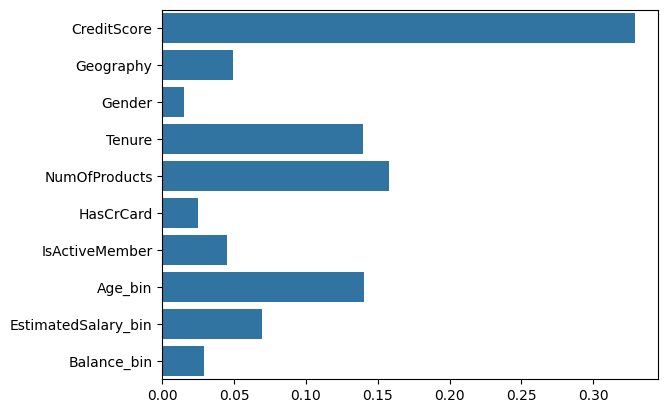

In [ ]:
print(model.feature_importances_)
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
# accuracy score 구하기
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_predict) * 100, 3), "%")

Accuracy: 79.529 %


In [ ]:
# f1 score 구하기
from sklearn.metrics import f1_score

y_predict = model.predict(X_test)
print("F1-Score:", round(f1_score(y_test, y_predict) * 100, 3), "%")

F1-Score: 51.111 %


# 미션 4) 하이퍼파라미터 튜닝

* 그리드 서치, 랜덤 서치 등을 활용하여 모델의 하이퍼파라미터를 조정하여 모델의 성능을 최적화합니다.
* 이 때, 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행합니다.
* (참고) xgboost, lightGBM, catBoost는 하이퍼파라미터 튜닝 기능을 제공합니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state = 42),
              RandomForestClassifier(random_state = 42)]

# estimators = [DecisionTreeClassifier(random_state=42),
#               RandomForestClassifier(random_state=42),
#               GradientBoostingClassifier(random_state=42)
#               ]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42)]

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth" : range(4, 8),
              "max_features" : [0.5, 0.7, 1.0]}

results = list()

for estimator in estimators :
    result = list()
    # if estimator.__class__.__name__ != 'DecisionTreeClassifier' :
    #     param_grid["n_estimators"] = [100, 120, 150]

    clf = GridSearchCV(estimator,
                       param_grid,
                       scoring = "accuracy",
                       n_jobs = -1,
                       cv = 5,
                       verbose = 2
                       )

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


↑ 8분 6초 걸림(2024-02-07 00:15 완료)

In [ ]:
df_ransc = pd.DataFrame(results,
                        columns = ["estimator", "best_params", "train_score", "test_score", "cv_result"])
df_ransc

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_depth': 7, 'max_features': 0.7}",0.856582,0.857212,"{'mean_fit_time': [0.13548746109008789, 0.1577..."
1,RandomForestClassifier,"{'max_depth': 7, 'max_features': 1.0}",0.857173,0.857454,"{'mean_fit_time': [9.063225030899048, 10.68829..."


In [ ]:
pd.DataFrame(df_ransc.loc[1, "cv_result"]).sort_values(by="rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,21.357011,1.001299,0.406823,0.114055,7,1.0,"{'max_depth': 7, 'max_features': 1.0}",0.854124,0.856510,0.856239,0.858852,0.860140,0.857173,0.002109,1
10,16.080460,0.102892,0.376188,0.016056,7,0.7,"{'max_depth': 7, 'max_features': 0.7}",0.854124,0.855715,0.854800,0.859269,0.860178,0.856817,0.002443,2
9,13.125636,0.177460,0.364698,0.004820,7,0.5,"{'max_depth': 7, 'max_features': 0.5}",0.853973,0.856169,0.854762,0.858852,0.859837,0.856719,0.002278,3


# 미션 5) 모델 평가 및 선택

* 학습된 모델을 테스트 데이터 또는 새로운 데이터에 적용하여 성능을 평가합니다.
* 이 때 사용할 평가 지표는 태스크에 따라 다를 수 있습니다.
* 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-score 등을 고려합니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42,
                               max_depth = clf.best_params_["max_depth"],
                               max_features = clf.best_params_["max_features"]
                               )
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=1.0, random_state=42)

In [ ]:
# accuracy score 구하기
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_predict) * 100, 3), "%")

Accuracy: 85.745 %


↑ Accuracy 기존 베이스라인모델(의사결정나무) 79.529% 에서 85.745% 로 향상

In [ ]:
# f1 score 구하기
from sklearn.metrics import f1_score

y_predict = model.predict(X_test)
print("F1-Score:", round(f1_score(y_test, y_predict) * 100, 3), "%")

F1-Score: 58.645 %
